In [7]:
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import  Conv2D, Dropout, MaxPooling2D, Dense, Flatten
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionResNetV2



## Loading Dataset

In [2]:
dataset_dir= "Potato_Disease_Dataset/PotatoPlants/"
batch_size= 32
image_height= 256
image_width= 256
validation_split= 0.25
test_val_split=0.5


def load_and_split_dataset(data_dir, validation_split):
     
    
    # List class names
    class_names = sorted(os.listdir(data_dir))
    
    # Prepare data lists
    images = []
    labels = []
    
    # Load images and labels
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            images.append(img_path)
            labels.append(label)
    
    # Convert lists to numpy arrays
#     images = np.array(images)
#     labels = np.array(labels)
    print("Images: ",len(images))
    print("Labels: ",len(labels))
    
    
    # Split data into training and validation sets
    train_images, val_images, train_labels, val_labels = train_test_split(
        images, labels, test_size=validation_split, stratify=labels
    )
    print("Train images: ",len(train_images))
    print("Train labels: ", len(train_labels))
    print("Val1_images: ", len(val_images))
    print("Val1_labels: ", len(val_labels))
    test_images, val2_images, test_labels, val2_labels = train_test_split(
        val_images, val_labels, test_size=test_val_split, stratify=val_labels
    )
    print("Test images: ",len(test_images))
    print("Test labels: ", len(test_labels))
    print("Val2_images: ", len(val2_images))
    print("Val2_labels: ", len(val2_labels))
    
    return train_images, val2_images, train_labels, val2_labels, test_images, test_labels
train_images, val_images, train_labels, val_labels, test_images, test_labels=load_and_split_dataset(dataset_dir, validation_split)

Images:  2152
Labels:  2152
Train images:  1614
Train labels:  1614
Val1_images:  538
Val1_labels:  538
Test images:  269
Test labels:  269
Val2_images:  269
Val2_labels:  269


## Data Loading and Normalizing

In [3]:
def load_and_process_images(images):
    images_array=[]
    for image in images:
        
        image_matrix= cv2.imread(image)
        image_matrix= np.divide(image_matrix,255)
        images_array.append(image_matrix)
    return np.array(images_array)
print("Train images: ", len(train_images))
print("Train labels: ", len(train_labels))
train_images= load_and_process_images(train_images)
val_images= load_and_process_images(val_images)
test_images= load_and_process_images(test_images)

train_labels= np.array(train_labels)
val_labels= np.array(val_labels)
test_labels= np.array(test_labels)
print("Train images: ", len(train_images))
print("Test images: ", len(test_images))
print("Val images: ", len(val_images))
print("Train labels: ", len(train_labels))

    

Train images:  1614
Train labels:  1614
Train images:  1614
Test images:  269
Val images:  269
Train labels:  1614


## The Architecture

In [26]:
model= Sequential()
model.add(Conv2D(2, (3,3), activation='relu', input_shape=(256,256,3) ))
model.add(MaxPooling2D(pool_size=(2,2)))
          
          
model.add(Conv2D(4, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
          
model.add(Conv2D(8, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())
          
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

    
                    

## Early Stopping

In [27]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # or 'val_accuracy' depending on what you're monitoring
    patience=3,  # number of epochs with no improvement to wait before stopping
    mode='max',  # 'min' for loss (want to minimize) or 'max' for accuracy (want to maximize)
    verbose=1,  # to print out messages
    restore_best_weights= True
)


## Compilation

In [28]:
    model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

## Model Fitting

In [29]:

history= model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs= 100, batch_size= 32, callbacks=[early_stopping])


Epoch 1/100
51/51 [==============================] - 17s 245ms/step - loss: 0.8763 - accuracy: 0.5180 - val_loss: 0.8066 - val_accuracy: 0.7509
Epoch 2/100
51/51 [==============================] - 8s 158ms/step - loss: 0.6636 - accuracy: 0.7565 - val_loss: 0.5814 - val_accuracy: 0.7881
Epoch 3/100
51/51 [==============================] - 8s 146ms/step - loss: 0.4612 - accuracy: 0.8463 - val_loss: 0.6301 - val_accuracy: 0.7249
Epoch 4/100
51/51 [==============================] - 8s 151ms/step - loss: 0.3830 - accuracy: 0.8618 - val_loss: 0.4230 - val_accuracy: 0.8364
Epoch 5/100
51/51 [==============================] - 9s 169ms/step - loss: 0.3303 - accuracy: 0.8680 - val_loss: 0.4888 - val_accuracy: 0.8067
Epoch 6/100
51/51 [==============================] - 7s 141ms/step - loss: 0.3519 - accuracy: 0.8625 - val_loss: 0.3455 - val_accuracy: 0.8550
Epoch 7/100
51/51 [==============================] - 7s 144ms/step - loss: 0.2540 - accuracy: 0.9021 - val_loss: 0.3097 - val_accuracy: 0.866

## Visualizing Performance

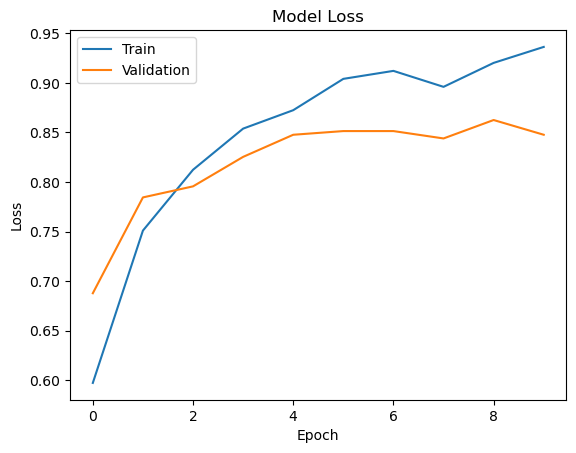

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [66]:

predictions= model.predict(test_images)

9/9 [==============================] - 1s 66ms/step


In [67]:
predicted=np.argmax(predictions, axis=1)

In [68]:
test_loss, test_accuracy=model.evaluate(test_images, test_labels)

9/9 [==============================] - 1s 50ms/step - loss: 0.1804 - accuracy: 0.9368


We are able to achieve almost 94% accuracy on test set which isn't bad though there is room to improve. It is also a sign that we have not overfit the data since the difference between train set accuracy  (98%)and test set accuracy is not much.

## Accuracy testing

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels, predicted))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       125
           1       0.96      0.91      0.93       125
           2       0.76      0.68      0.72        19

    accuracy                           0.94       269
   macro avg       0.89      0.87      0.88       269
weighted avg       0.94      0.94      0.94       269



## Now Moving towars Transfer Learning.


I have provided all the code for transfer learning and full configuration and adoption details.
I have not trained this model on my problem. The purpose of including this code was to show how we can use the pretrained models for our problems and the gory part of adoption which has been specified.
.\
.\
Moreover, the comments have been added to explain choices and meaning of keyword arguments.

In [32]:

base_model= keras.applications.InceptionResNetV2(
    include_top=False,# Since we want to specify our own fully connected layers and input layer
    weights="imagenet",
    input_shape=(256,256,3), # When 'include_top=False', then you have to specify input shape

    classifier_activation="softmax",# Since we have 3 classes
)

# Making sure that the conv net layers are not trained again 
for layer in base_model.layers:
    layer.trainable= False


# This thing down here is to get the output of the model
# just before it would have flattened it and passed it to fully connnected layers
x = base_model.output


x =Flatten()(x)  # GlobalAveragePooling2D would have been a better choice for Inception model 
                 # I am using Flatten without any reason
    
    
x = Dense(64, activation='relu')(x) # Our fully connected layer


predictions = Dense(3, activation='softmax')(x)  # Output layer for 3 classes

# Combining the pretrained and newly defined architecture of our model
model = Model(inputs=base_model.input, outputs=predictions)


In [16]:

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, batch_size=32, callbacks=[early_stopping])